In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
shrooms = pd.read_csv('mushrooms.csv')

In [4]:
print(shrooms.DESCR)

AttributeError: 'DataFrame' object has no attribute 'DESCR'

In [5]:
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
shrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
shrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
shrooms_target = shrooms[['class']]

In [8]:
shrooms_target.index

RangeIndex(start=0, stop=8124, step=1)

In [9]:
shrooms_target[:5]

,class
0,p
1,e
2,e
3,p
4,e


In [10]:
shrooms_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 1 columns):
class    8124 non-null object
dtypes: object(1)
memory usage: 63.5+ KB


In [11]:
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [12]:
shrooms['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

w    7924
o      96
n      96
y       8
Name: veil-color, dtype: int64


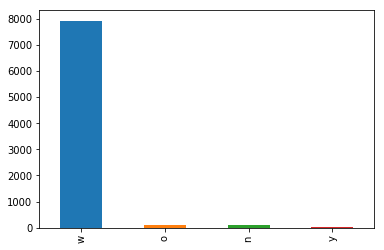

In [52]:
veil_count = shrooms['veil-color'].value_counts()
veil_count.plot(kind='bar')
print(veil_count)

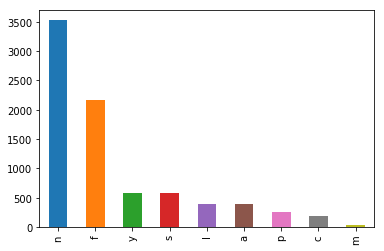

In [14]:
odor_count = shrooms['odor'].value_counts()
odor_count.plot(kind='bar')

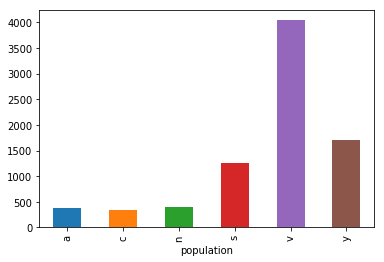

In [15]:
shrooms.groupby('population').size().plot(kind='bar')

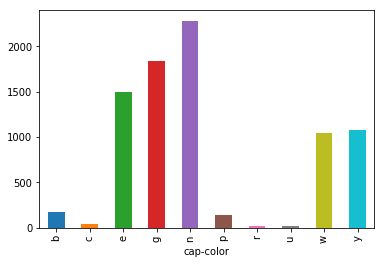

In [16]:
shrooms.groupby('cap-color').size().plot(kind='bar')

In [81]:
shrooms['ring-number'].value_counts()

o    7488
t     600
n      36
Name: ring-number, dtype: int64

In [66]:
shrooms.groupby(['ring-number', 'class']).size().unstack()

class,e,p
ring-number,,
n,NaN,36.0
o,3680.0,3808.0
t,528.0,72.0


In [17]:
shrooms.groupby(['class','cap-color']).size().unstack()

cap-color,b,c,e,g,n,p,r,u,w,y
class,,,,,,,,,,
e,48.0,32.0,624.0,1032.0,1264.0,56.0,16.0,16.0,720.0,400.0
p,120.0,12.0,876.0,808.0,1020.0,88.0,NaN,NaN,320.0,672.0


In [70]:
shrooms.groupby(['class','cap-color']).size()

class  cap-color
e      b              48
       c              32
       e             624
       g            1032
       n            1264
       p              56
       r              16
       u              16
       w             720
       y             400
p      b             120
       c              12
       e             876
       g             808
       n            1020
       p              88
       w             320
       y             672
dtype: int64

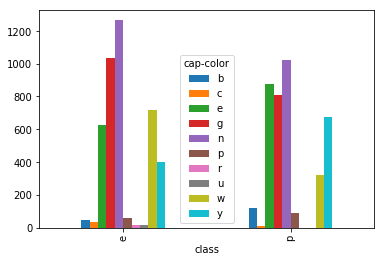

In [18]:
shrooms.groupby(['class','cap-color']).size().unstack().plot(kind='bar')

# Brown mushrooms seem to be prevalent color for mushrooms. Appearing a lot in poisonous and edible category
# Argument can be made for this as good indicator or poor 

In [32]:
is_brown = shrooms['cap-color'] == 'n'
poison_count = shrooms['class'] == 'p'
shrooms[brown_count & poison_count][:5]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
17,p,x,s,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,g
19,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,n,s,u
21,p,x,y,n,t,p,f,c,n,n,...,s,w,w,p,w,o,p,n,v,g
37,p,x,y,n,t,p,f,c,n,w,...,s,w,w,p,w,o,p,n,s,u


In [33]:
shrooms[is_brown & poison_count][['class','cap-surface','gill-size','veil-color','habitat']][:10]

,class,cap-surface,gill-size,veil-color,habitat
0,p,s,n,w,u
17,p,s,n,w,g
19,p,s,n,w,u
21,p,y,n,w,g
37,p,y,n,w,u
53,p,y,n,w,u
78,p,y,n,w,u
122,p,y,n,w,g
138,p,s,n,w,g
228,p,y,n,w,u


In [46]:
brown_count = shrooms[is_brown]
brown_count['class'].value_counts()

e    1264
p    1020
Name: class, dtype: int64

In [83]:
shrooms.groupby('class').size()

class
e    4208
p    3916
dtype: int64

In [48]:
brown_count['class'].value_counts() / shrooms.groupby('class').size()

e    0.30038
p    0.26047
dtype: float64

In [19]:
shrooms.groupby(['class','bruises']).size().unstack()

bruises,f,t
class,,
e,1456,2752
p,3292,624


In [95]:
poison_count.value_counts() 

False    4208
True     3916
Name: class, dtype: int64

In [100]:
X = shrooms.drop('class',axis=1)
y = shrooms_target

In [101]:
ridge_reg = Ridge(alpha = 1)

In [102]:
dum_shrooms = pd.get_dummies(X)

In [103]:
dum_shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB


In [27]:
dum_shrooms.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [28]:
dum_shrooms.shape

(8124, 117)

In [86]:
shrooms_target.shape

(8124, 1)

In [30]:
dum_shrooms.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,0.399311,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,0.489787,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
